In [1]:
import numpy as np
from skimage import io, data
import matplotlib.pyplot as plt

In [24]:
def show(img_list, caption_list, Axis=False, rescale = True):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        if rescale:
            ax[i].imshow(img_list[i], cmap='gray')
        else:
            ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [2]:
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [3]:
def brightness(lin, col, I, deltaI):
    img = np.ones((lin,col), dtype=np.uint8)*I
    ini_lin = lin // 3
    ini_col = col // 3
    img[ini_lin:ini_lin*2, ini_col:ini_col*2] = I + deltaI
    return img


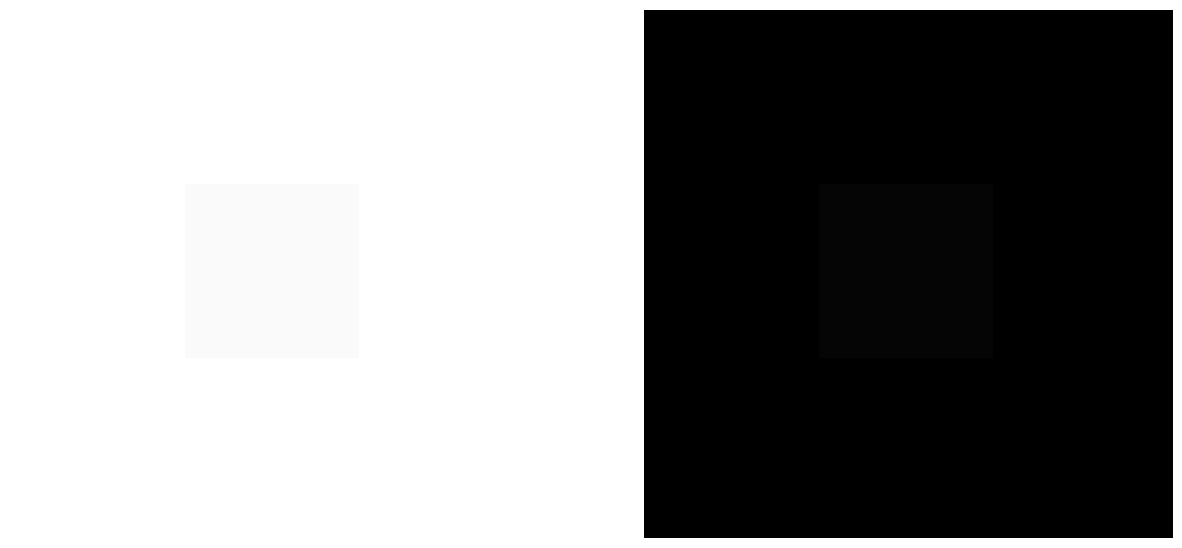

In [28]:
delta = 5
img1 = brightness(100,100,255,-delta)
img2 = brightness(100,100,0,delta)

#plt.subplot(121)
#plt.imshow(img1, cmap='gray', vmin = 0, vmax=255)
#plt.axis('image')
#plt.subplot(122)
#plt.imshow(img2, cmap='gray', vmin = 0, vmax=255)
#plt.axis('off')

show([img1, img2], ['',''], rescale = False)

In [11]:
def MachBand(levels = 10):
    colours= 256;

    hsize= 500;
    vsize= 250;
    #colormap( gray(colours) );
    hline= np.ceil( np.linspace( 1, levels+1, hsize) )* colours/(levels + 2);
    print(hline.shape)
    nimg = np.matmul(np.ones((vsize,1)), hline.reshape(1, 500)) 
    return nimg

(500,)


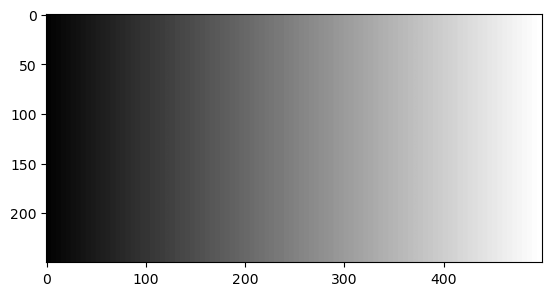

In [13]:
nimg = MachBand(100)
plt.imshow(nimg, cmap='gray')

## Transformações Geométricas

<p>
<ol>
  <li> <b>skimage.transform.rescale</b>: reescala uma imagem.</li>
  <li> <b>skimage.transform.resize</b>: redimensiona uma imgem.</li>
  <li> <b>skimage.transform.rotate</b>:  rotaciona uma imagem.</li>
  <li><b>skimage.transform.AffineTransform</b>: gera uma matriz de transformação</li>
  <li><b> skimage.transform.warp</b>: executa a transformação geométrica a partir da matriz de transformação </li>
</ol>
</p>


# Reescala de uma imagem

<p>
<b>skimage.transform.rescale</b>(image, scale, channel_axis=None): Scale image by a certain factor.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> scale: {float, tuple of floats}. Scale factors. S</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul> 
    <li> rotated: ndarray. Scaled version of the input.</li>
    </ul> 
</p>

(300, 451, 3)
(150, 226, 3)


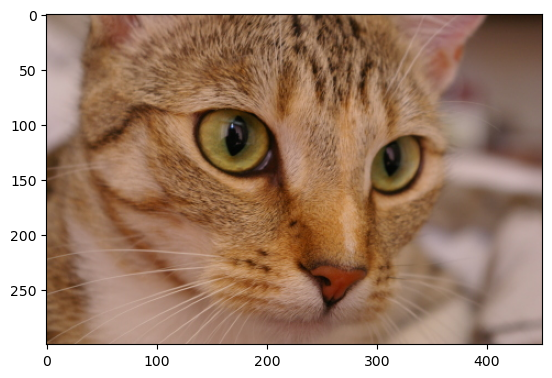

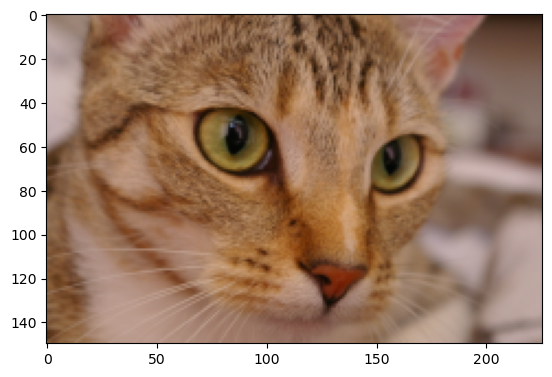

In [8]:
from skimage import transform
img = data.chelsea()
nimg = transform.rescale(img, (0.5, 0.5, 1))
print(img.shape)
print(nimg.shape)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(nimg)

## Resize

<p>
<b>skimage.transform.resize</b>(image, output_shape, order=None, mode='reflect', cval=0, clip=True): Resize image to match a certain size.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> output_shape: Size of the generated output image (rows, cols[, …][, dim]). If dim is not provided, the number of channels is preserved</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul> 
    <li> resized: Resized version of the input.</li>
    </ul> 
</p>


(200, 300, 3)


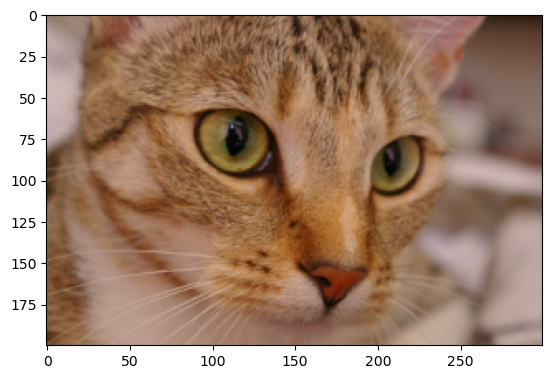

In [9]:
nimg3 = transform.resize(img, (200, 300))
print(nimg3.shape)
plt.imshow(nimg3)

## Rotação

<p>
  <b>skimage.transform.rotate</b>(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False): 
  Rotate image by a certain angle around its center.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> angle: float. Rotation angle in degrees in counter-clockwise direction.</li>
  <li> resize: bool, optional. Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False. </li>
  <li> center: iterable of length 2. The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering. </li>
  </ul>
  Result
  <ul> 
  <li> rotated: ndarray. Rotated version of the input.</li>
  </ul> 
</p>

(300, 451, 3)
(452, 532, 3)
(2,)


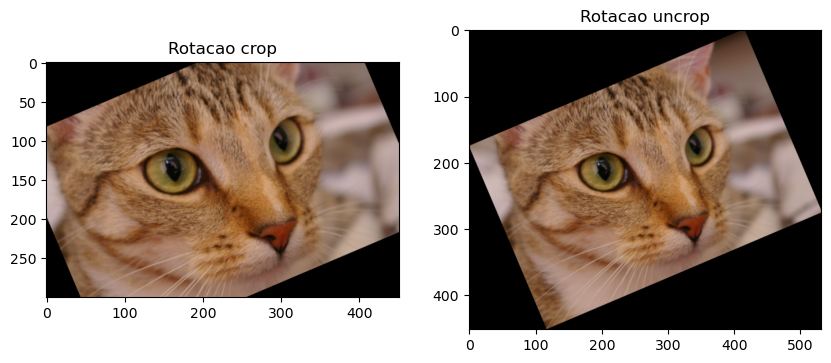

In [29]:
from skimage import transform
nimg4 = transform.rotate(img, 23)
nimg5 = transform.rotate(img, 23, resize=True, cval=0)
print(nimg4.shape)
print(nimg5.shape)
f, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(nimg4)
axs[0].set_title('Rotacao crop')
axs[1].imshow(nimg5)
axs[1].set_title('Rotacao uncrop')
print(axs.shape)

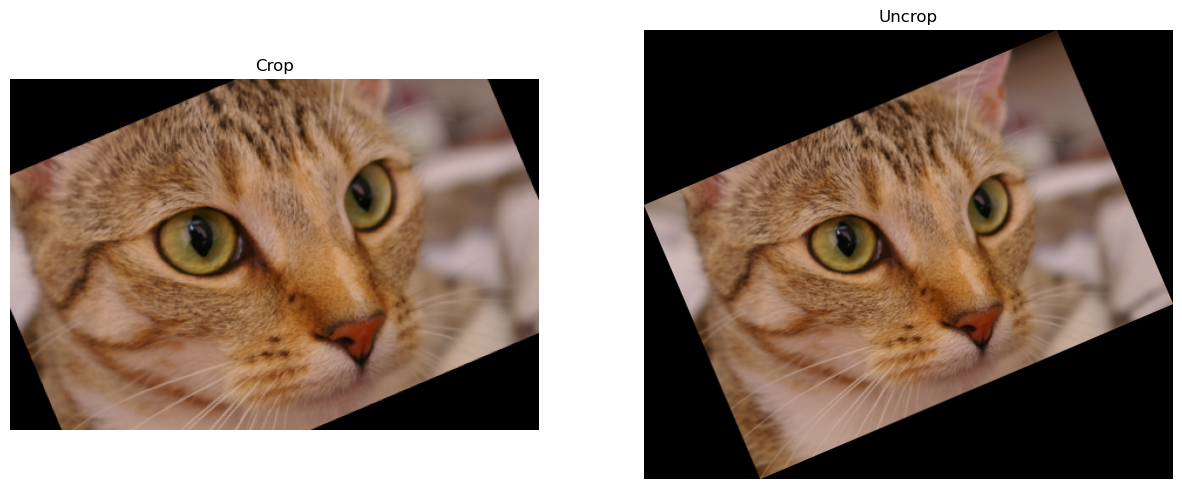

In [30]:
show([nimg4, nimg5], ['Crop','Uncrop'])

## Reduz tamanho calculando a media por janela

<p>
  <b>transform.downscale_local_mean</b>(image, factors, cval=0): 
  Down-sample N-dimensional image by local averaging. The image is padded with cval if it is not perfectly divisible by the integer factors.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> factors: Array containing down-sampling integer factor along each axis.</li>
  <li> cval:  Constant padding value if image is not perfectly divisible by the integer factors</li>
  </ul>
  Result
  <ul> 
  <li> image: ndarray. Down-sampled image with same number of dimensions as input image. For integer inputs, the output dtype will be float64. See numpy.mean() for details.</li>
  </ul> 
</p>

(300, 451, 3)
(150, 226, 3)
[[139.5  180.75 189.5 ]
 [134.25 130.5  155.75]
 [123.75 144.   129.5 ]]


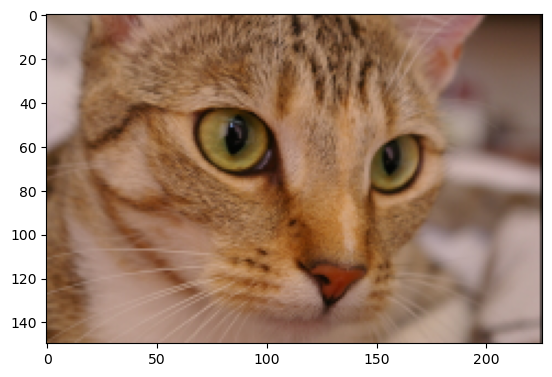

In [11]:
nimg6 = transform.downscale_local_mean(img, (2,2, 1), cval=0)
print(img.shape)
print(nimg6.shape)
plt.imshow(np.uint8(nimg6))
print(nimg6[70:73,70:73,0])

## downsample pyramid

<p>
  <b>transform.pyramid_reduce</b>((image, downscale=2, channel_axis=None): 
  Smooth and then downsample image.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> downscale: float. Downscale factor.</li>
  </ul>
  Result
  <ul> 
  <li> image: ndarray. Smoothed and downsampled float image.</li>
  </ul> 
</p>


(300, 451, 3)
(38, 57, 3)


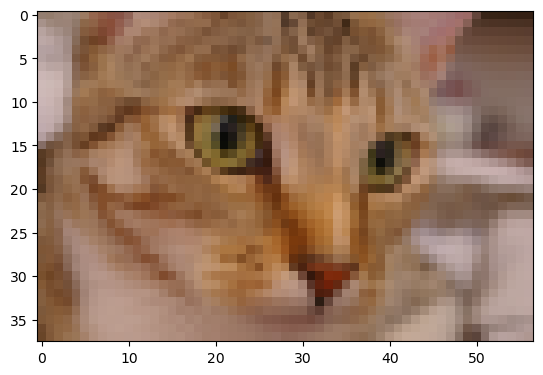

In [12]:
nimg7 = transform.pyramid_reduce(img, downscale=8, channel_axis=2)
print(img.shape)
print(nimg7.shape)
plt.imshow(nimg7)

## Upsample pyramid

<p>
  <b>transform.pyramid_expand</b>(image, upscale=2,channel_axis=None). Upsample and then smooth image.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> upscale: float. Upscale factor.</li>
  <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.</li>
  </ul>
  Result
  <ul> 
  <li> image: ndarray. Upsampled and smoothed float image.</li>
  </ul> 
</p>


(300, 451, 3)
(304, 456, 3)


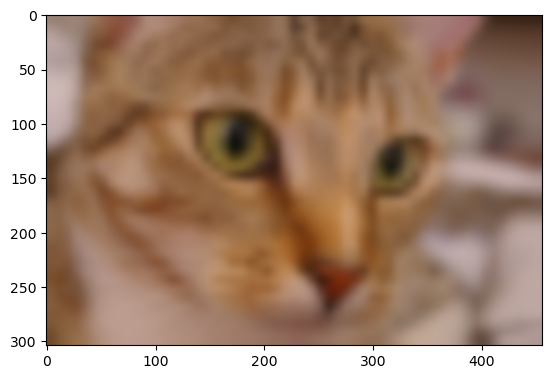

In [13]:
nimg8 = transform.pyramid_expand(nimg7, upscale=8, channel_axis=2)
print(img.shape)
print(nimg8.shape)
plt.imshow(nimg8)

## Matrizes de transformação

<ol>
  <li><b>skimage.transform.AffineTransform</b>(matrix=None, scale=None, rotation=None, shear=None, translation=None)</li>
    
  Parameters
  <ul>
  <li> matrix: (D+1, D+1) array, optional. Homogeneous transformation matrix. </li>
  <li> scale: {s as float or (sx, sy) as array, list or tuple}, optional.  Scale factor(s). </li>
  <li> rotation: float, optional. Rotation angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> shear: float, optional. Shear angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> translation: (tx, ty) as array, list or tuple, optional. Translation parameters. Only available for 2D.</li>
  </ul>

  <li><b> skimage.transform.warp</b>(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False): Warp an image according to a given coordinate transformation.</li>
    
  Parameters
  <ul>
  <li> image: ndarray. Input image. </li>
  <li> inverse_map: transformation object. Inverse coordinate map, which transforms coordinates in the output images into their corresponding coordinates in the input image. </li>
  <li> map_args: dict, optional. Keyword arguments passed to inverse_map.</li>
  <li> output_shape: tuple (rows, cols), optional. Shape of the output image generated. By default the shape of the input image is preserved. </li>
  <li> order: int, optional. The order of interpolation. The order has to be in the range 0-5: (0: Nearest-neighbor, 1: Bi-linear (default), 2: Bi-quadratic, 3: Bi-cubic, 4: Bi-quartic, 5: Bi-quintic)</li>
  </ul> 
  Result
  <ul> 
  <li> warped: double ndarray. The warped input image.</li>
  </ul>   
</ol>

<SimilarityTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
<EuclideanTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
<AffineTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
<ProjectiveTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>


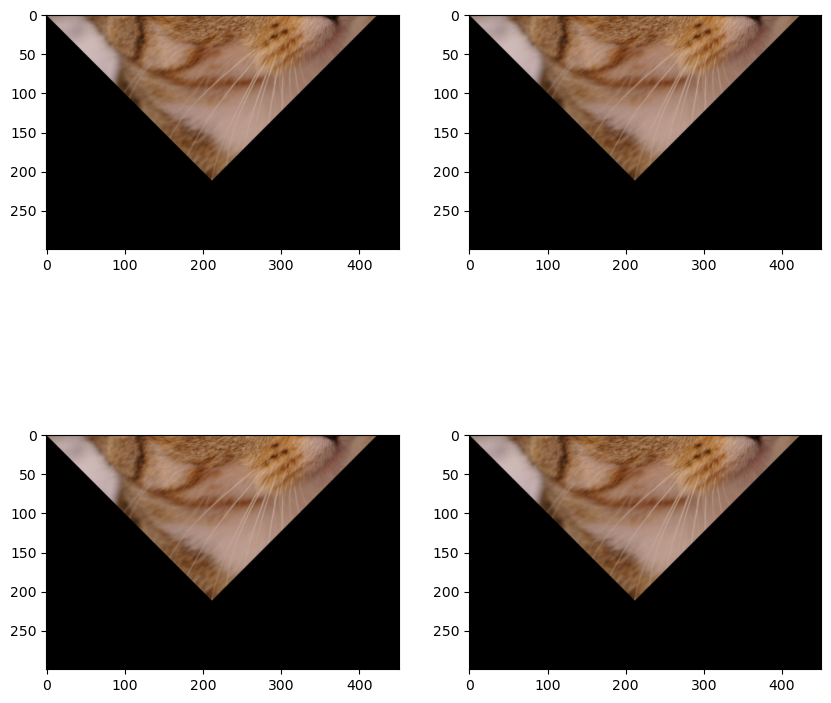

In [15]:
ang = 45 * np.pi / 180
dy, dx, c = img.shape
rot = np.array([[np.cos(ang), -np.sin(ang), 0],
                 [np.sin(ang), np.cos(ang), 0],
                 [0, 0, 1]]) 
tras = np.array([[1, 0, -dx/2],
                 [0, 1, -dy/2],
                 [0, 0, 1]])
tras2 = np.linalg.inv(tras)
#mat = tras2 @ rot @ tras
mat = rot
matrix1 = transform.SimilarityTransform(matrix=mat)
matrix2 = transform.EuclideanTransform(matrix=mat)
matrix3 = transform.AffineTransform(matrix=mat)
matrix4 = transform.ProjectiveTransform(matrix=mat)
print(matrix1)
print(matrix2)
print(matrix3)
print(matrix4)
#tf_img = transform.warp(img, matrix.inverse)
#plt.imshow(tf_img)
tf_img1 = transform.warp(img, matrix1)
tf_img2 = transform.warp(img, matrix2)
tf_img3 = transform.warp(img, matrix3)
tf_img4 = transform.warp(img, matrix4)

f2, axs2 = plt.subplots(2,2, figsize=(10,10))
axs2[0,0].imshow(tf_img1)
axs2[0,1].imshow(tf_img2)
axs2[1,0].imshow(tf_img3)
axs2[1,1].imshow(tf_img4)

In [16]:
tras = np.array([[1, 0, -dx/2],
                 [0, 1, -dy/2],
                 [0, 0, 1]])
tras2 = np.linalg.inv(tras)
print(tras)
print(tras2)


[[   1.     0.  -225.5]
 [   0.     1.  -150. ]
 [   0.     0.     1. ]]
[[  1.    0.  225.5]
 [  0.    1.  150. ]
 [  0.    0.    1. ]]


Rotação 
<EuclideanTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
Traslaçãoção negativa 
<EuclideanTransform(matrix=
    [[   1. ,   -0. , -225.5],
     [   0. ,    1. , -150. ],
     [   0. ,    0. ,    1. ]])>
Traslaçãoção positiva 
[[  1.    0.  225.5]
 [  0.    1.  150. ]
 [  0.    0.    1. ]]
Transformação completa 
[[   0.70710678   -0.70710678  172.11343802]
 [   0.70710678    0.70710678 -115.51859634]
 [   0.            0.            1.        ]]
Rotação + Traslação
<EuclideanTransform(matrix=
    [[   0.70710678,   -0.70710678, -225.5       ],
     [   0.70710678,    0.70710678, -150.        ],
     [   0.        ,    0.        ,    1.        ]])>


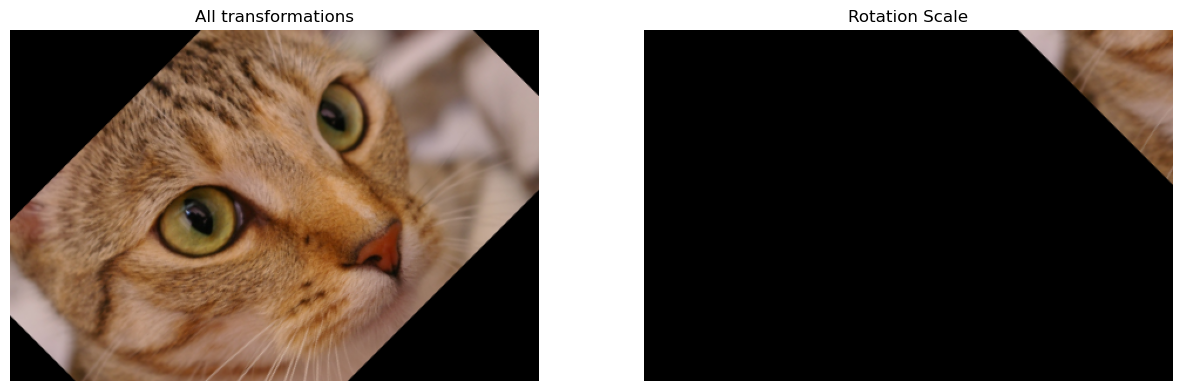

In [35]:
rotation = transform.EuclideanTransform(rotation=np.pi/4)
print('Rotação ')
print(rotation)
shift = transform.EuclideanTransform( translation=-np.array(img.shape[1::-1])/2 )
print('Traslaçãoção negativa ')
print(shift)
shift_inv = np.linalg.inv(shift.params)
print('Traslaçãoção positiva ')
print(shift_inv)
mat_transf = shift_inv @ rotation.params @ shift.params
print('Transformação completa ')
print(mat_transf)

new_mat = transform.EuclideanTransform(rotation=np.pi/4, translation=-np.array(img.shape[1::-1])/2)
print('Rotação + Traslação')
print(new_mat)


tform = transform.EuclideanTransform(mat_transf)
tf_nimg = transform.warp(img, tform)
tf_nimg2 = transform.warp(img, new_mat)
#plt.imshow(tf_nimg)
show([tf_nimg, tf_nimg2], ['All transformations', 'Rotation Scale'])


# Rotação pixel a pixel

In [18]:
def rotacao_manual(img, ang):
    lin, col = img.shape[:2]
    ang_r = ang*2*np.pi/360
    nimg = np.zeros_like(img)

    mat_t = np.array([ [1, 0, -lin/2], 
                       [0, 1, -col/2],
                       [0, 0, 1]])
    mat_r = np.array( [[np.cos(ang_r), -np.sin(ang_r), 0],
                       [np.sin(ang_r), np.cos(ang_r), 0],
                       [0, 0, 1] ])
    mat_t2 = np.array([ [1, 0, lin/2], 
                       [0, 1, col/2],
                       [0, 0, 1]])    
    
    mat = mat_t2 @ mat_r @ mat_t

    for i in range(lin):
        for j in range(col):
            ncoord = mat @ np.array([ [i], [j], [1] ])
            ni = int(ncoord[0])
            nj = int(ncoord[1])

            if ni >=0 and ni < lin and nj >=0 and nj < col :
                nimg[ni, nj, :] = img[i,j,:]
    return nimg
    

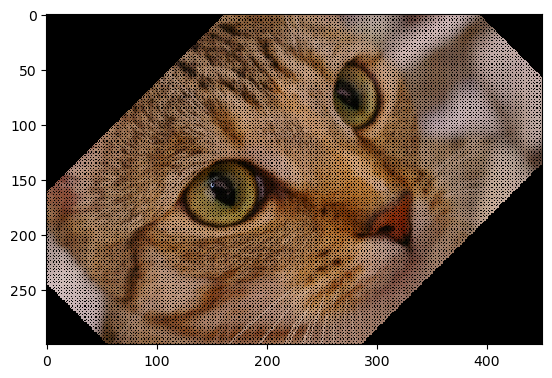

In [19]:
nimg = rotacao_manual(img, ang=45)
plt.imshow(nimg, interpolation='nearest')

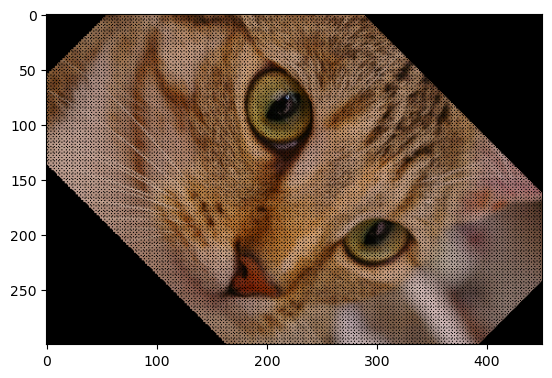

In [20]:
ang = 45 * np.pi / 180
dx, dy, c = img.shape
nimg = np.zeros((dx,dy,c), dtype=int)

rot = np.array([[np.cos(ang), np.sin(ang), 0],
                 [-np.sin(ang), np.cos(ang), 0],
                 [0, 0, 1]]) 
tras = np.array([[1, 0, -dx/2],
                 [0, 1, -dy/2],
                 [0, 0, 1]])
tras2 = np.linalg.inv(tras)
mat = tras2 @ rot @ tras

nimg = np.zeros_like(img)

for i in range(dx):
    for j in range(dy):
        coord = np.array([[i],[j],[1]])
        ncoord = np.intc(mat @ coord)
        ni = ncoord[0]
        nj = ncoord[1]
        if ni >=0 and ni < dx and nj >=0 and nj < dy:
            nimg[ni,nj,:] = img[i,j,:]

plt.imshow(nimg)
